<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Titanic-Challenge" data-toc-modified-id="Titanic-Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Titanic Challenge</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Finding-missing-data" data-toc-modified-id="Finding-missing-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Finding missing data</a></span></li><li><span><a href="#Finding-categorical-columns" data-toc-modified-id="Finding-categorical-columns-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Finding categorical columns</a></span></li></ul></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Model-creation" data-toc-modified-id="Model-creation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model creation</a></span><ul class="toc-item"><li><span><a href="#Linear-model" data-toc-modified-id="Linear-model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Linear model</a></span></li><li><span><a href="#Deep-model" data-toc-modified-id="Deep-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Deep model</a></span></li></ul></li><li><span><a href="#Test-Data" data-toc-modified-id="Test-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Test Data</a></span><ul class="toc-item"><li><span><a href="#Test-Data-preprocessing" data-toc-modified-id="Test-Data-preprocessing-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Test Data preprocessing</a></span></li></ul></li></ul></div>

# Titanic Challenge

<a href='https://www.kaggle.com/c/titanic'>Kaggle challenge link</a>
<br><br>

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path = '../data/titanic_data/train.csv'

data = pd.read_csv(data_path)

In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data preprocessing

## Finding missing data

In [5]:
columns_missing_values = [col for col in data.columns if data[col].isnull().any()]
print('Columns having NaN values are->' + str(columns_missing_values))

Columns having NaN values are->['Age', 'Cabin', 'Embarked']


In [6]:
print('Number of rows with NaN for Cabin column ->' + str(data.Cabin.isnull().sum()))

Number of rows with NaN for Cabin column ->687


In [7]:
print('Number of rows with NaN for Age column ->' + str(data.Age.isnull().sum()))

Number of rows with NaN for Age column ->177


In [8]:
print('Number of rows with NaN for Embarked column ->' + str(data.Embarked.isnull().sum()))

Number of rows with NaN for Embarked column ->2


In [9]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [10]:
data.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

## Finding categorical columns

In [12]:
object_columns = [col for col in data.columns if str(data[col].dtype) == 'object']
print('Columns having dtype = object -> ' + str(object_columns))

Columns having dtype = object -> ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [13]:
category_columns = ['Sex', 'Embarked']

In [14]:
for col in category_columns:
    data[col] = data[col].astype('category')
    data[col+'_category'] = data[col].cat.codes
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_category,Embarked_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2


# Data Visualization

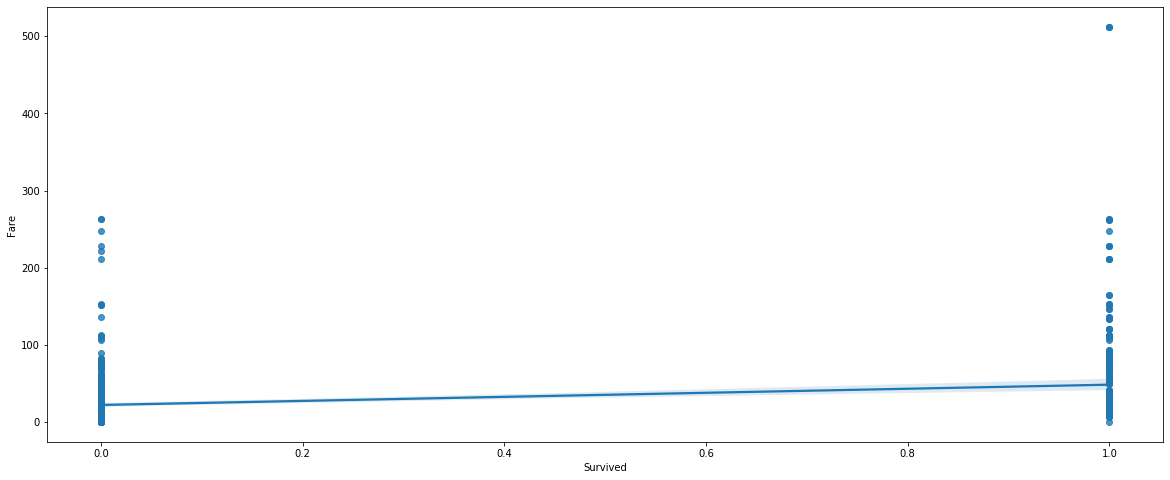

In [18]:
plt.figure(figsize=(20,8))
sns.regplot(x = data['Survived'], y=data['Fare'])

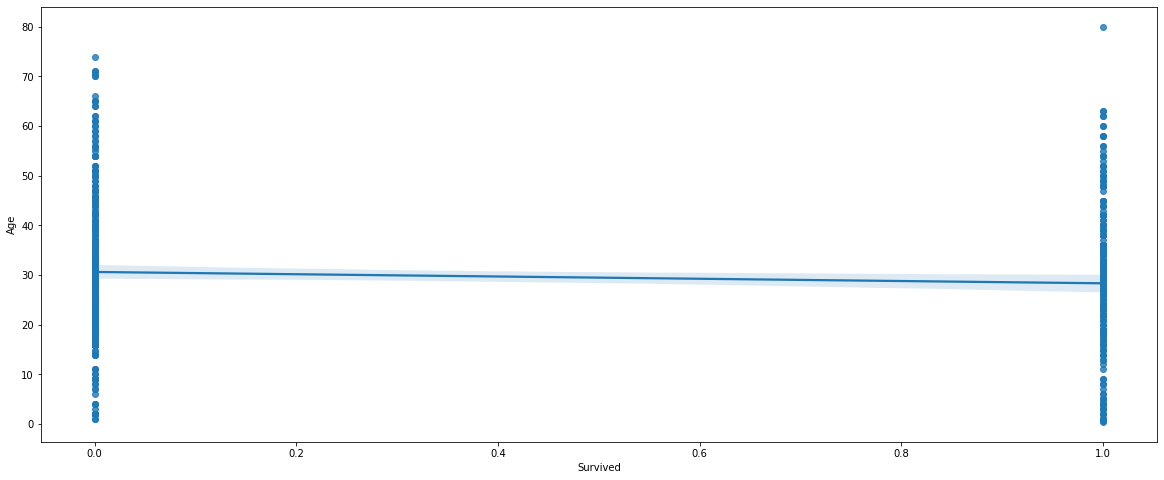

In [19]:
plt.figure(figsize=(20,8))
sns.regplot(x = data['Survived'], y=data['Age'])

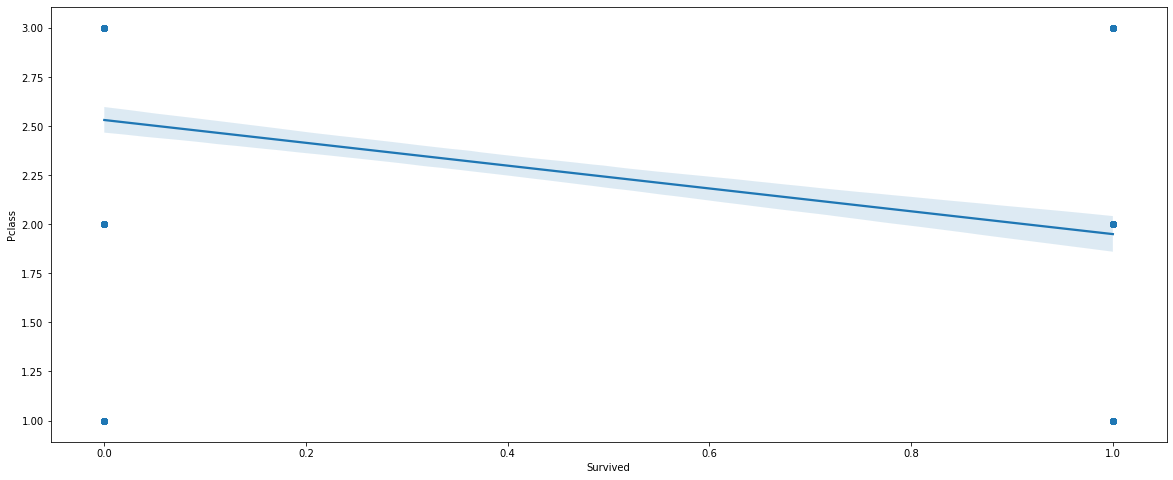

In [20]:
plt.figure(figsize=(20,8))
sns.regplot(x = data['Survived'], y=data['Pclass'])

<b>We can see here that the higher the Pclass the more survival rate the passenger has.</b>

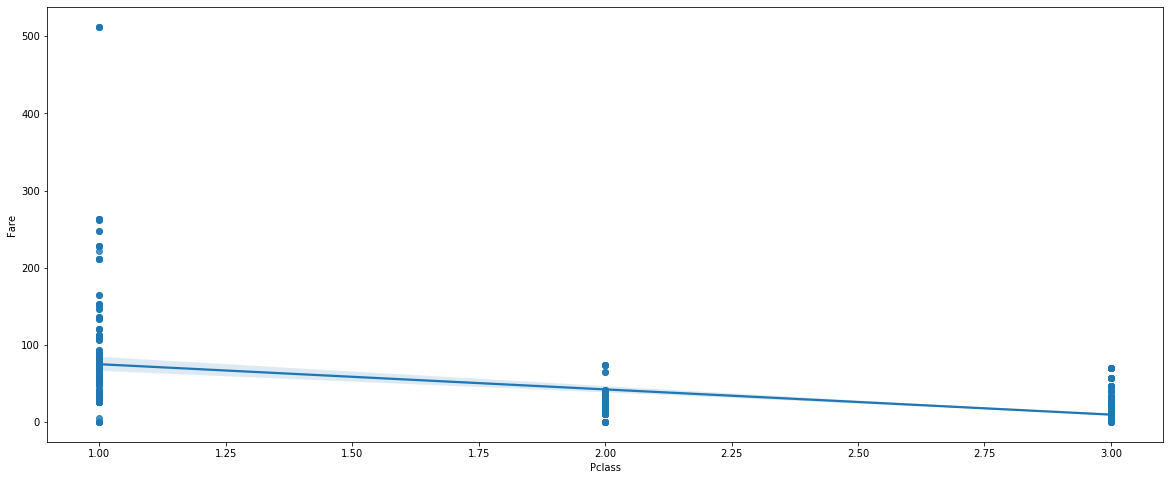

In [21]:
plt.figure(figsize=(20,8))
sns.regplot(x = data['Pclass'], y=data['Fare'])

<b>We can infer from this that more the Pclass of a passenger(1 is higher and 3 is lower), the more Fare he had paid for the journey. So we can just work with Fare or Pclass for now.</b>

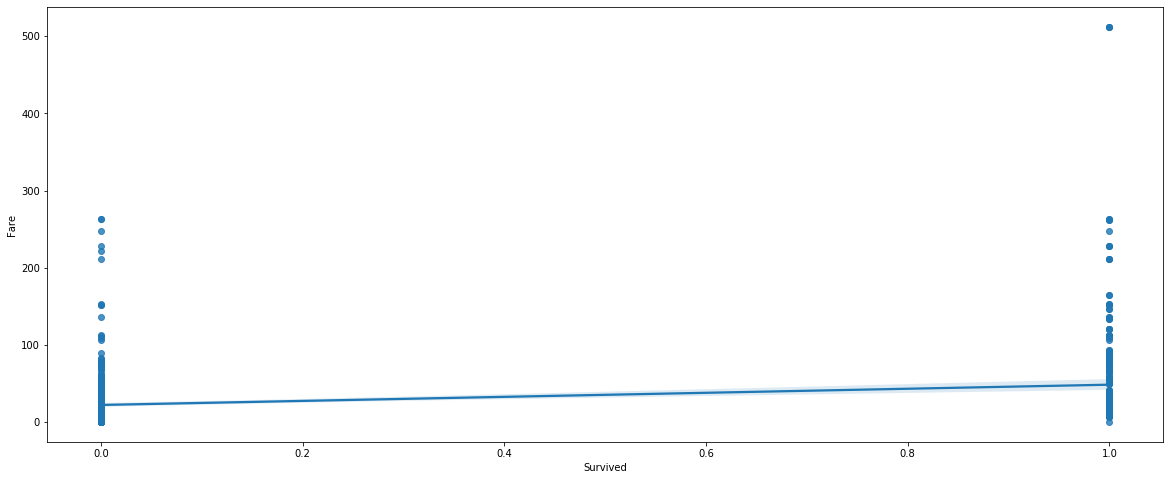

In [22]:
plt.figure(figsize=(20,8))
sns.regplot(x = data['Survived'], y=data['Fare'])

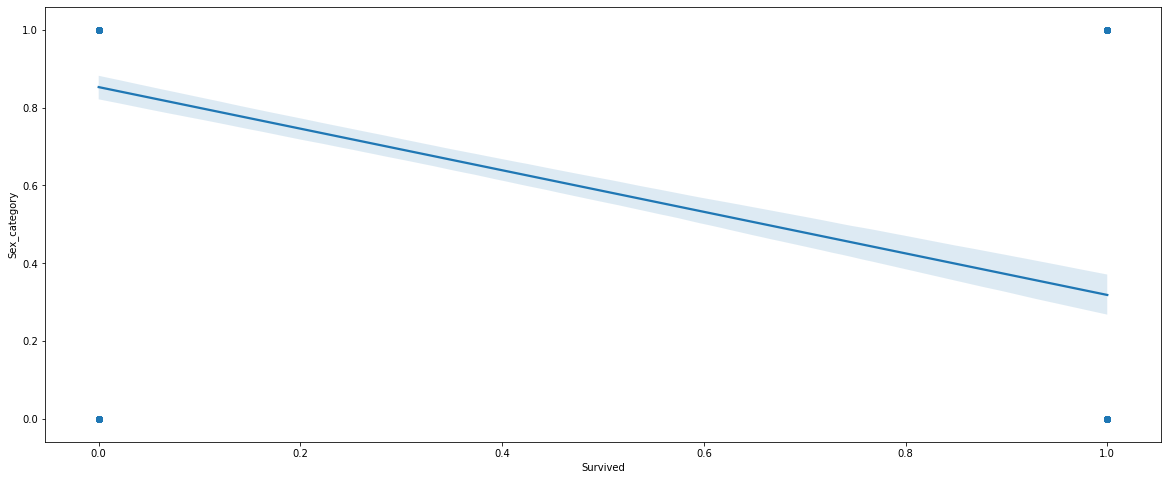

In [78]:
plt.figure(figsize=(20,8))
sns.regplot(x = data['Survived'], y=data['Sex_category'])

<b>We can see here that the female had a better survival rate compared to men.</b>

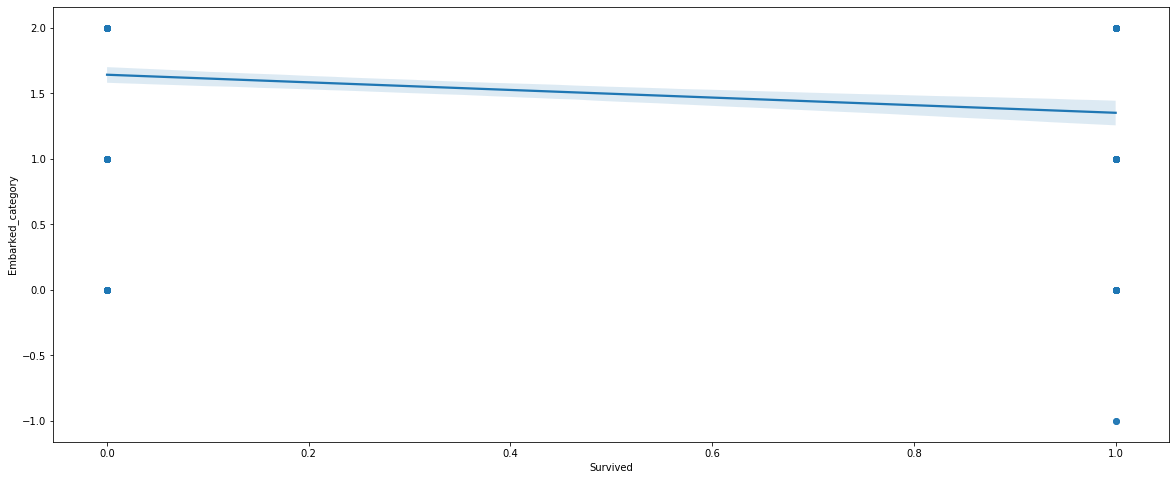

In [23]:
plt.figure(figsize=(20,8))
sns.regplot(x = data['Survived'], y=data['Embarked_category'])

<b>We have a basic correlation between Embarked category and survival rate</b>

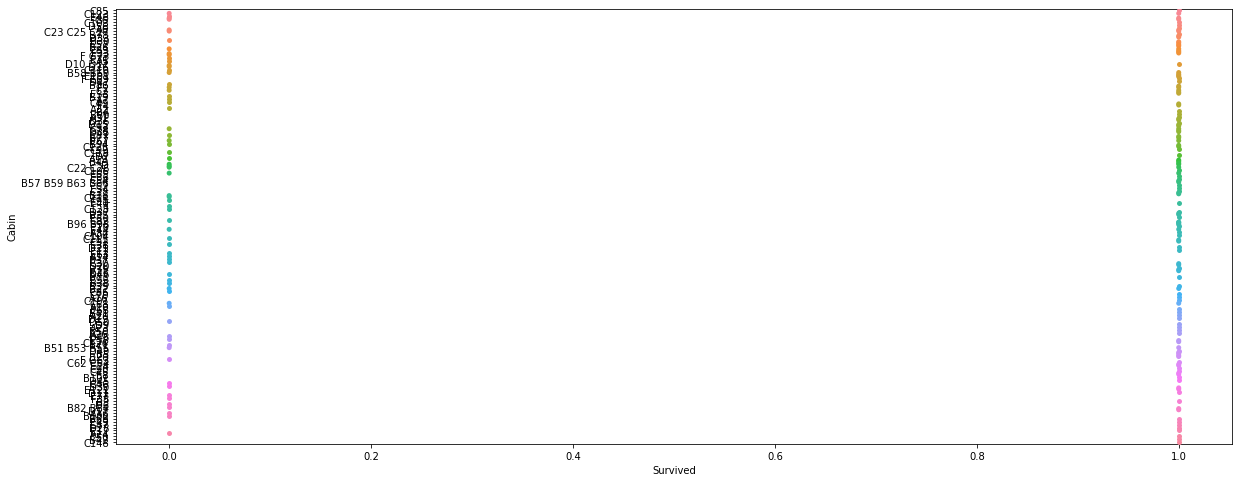

In [24]:
plt.figure(figsize=(20,8))
sns.swarmplot(x = data['Survived'], y=data['Cabin'])

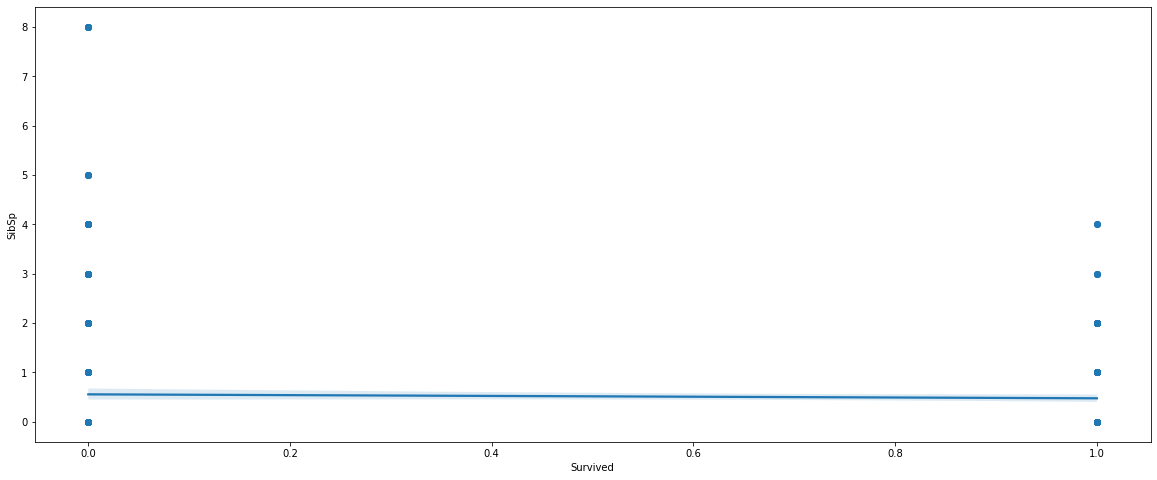

In [25]:
plt.figure(figsize=(20,8))
sns.regplot(x = data['Survived'], y=data['SibSp'])

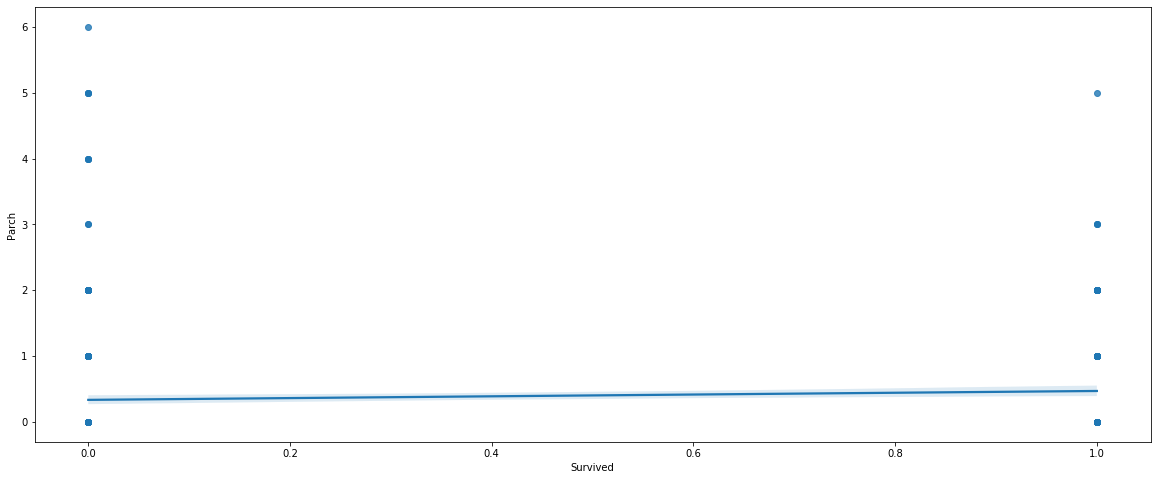

In [26]:
plt.figure(figsize=(20,8))
sns.regplot(x = data['Survived'], y=data['Parch'])

# Model creation

From the above figures we can pick some columns for our model.

In [27]:
columns = ['Fare', 'Sex_category', 'Pclass', 'Embarked_category']
label = 'Survived'

In [36]:
data_shuffled = data.sample(frac=1)
train_len = int(0.7 * len(data_shuffled))
X = data[columns].copy()
y = data[label].copy()
X_train = X[:train_len]
y_train = y[:train_len]
X_val = X[train_len:]
y_val = y[train_len:]

In [29]:
X.head()

,Fare,Sex_category,Pclass,Embarked_category
0,7.2500,1,3,2
1,71.2833,0,1,0
2,7.9250,0,3,2
3,53.1000,0,1,2
4,8.0500,1,3,2


In [38]:
print('Train data shape: '+ str(X_train.shape))
print('Validation data shape: '+ str(X_val.shape))

Train data shape: (623, 4)
Validation data shape: (268, 4)


In [40]:
X_train.head()

,Fare,Sex_category,Pclass,Embarked_category
0,7.2500,1,3,2
1,71.2833,0,1,0
2,7.9250,0,3,2
3,53.1000,0,1,2
4,8.0500,1,3,2


In [41]:
X_val.head()

,Fare,Sex_category,Pclass,Embarked_category
623,7.8542,1,3,2
624,16.1000,1,3,2
625,32.3208,1,1,2
626,12.3500,1,2,1
627,77.9583,0,1,2


In [43]:
X_train.values.shape

(623, 4)

## Linear model

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [31]:
n_features = X.shape[1]

In [58]:
model_v1 = Sequential()
model_v1.add(Dense(1, activation='sigmoid', input_shape = (n_features,)))

In [59]:
model_v1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
model_v1.fit(X_train.values, y_train.values, epochs=150, batch_size=32, verbose=1)

Train on 623 samples
Epoch 1/150
623/623 [==============================] - 0s 603us/sample - loss: 5.4022 - accuracy: 0.4061
Epoch 2/150
623/623 [==============================] - 0s 89us/sample - loss: 5.0736 - accuracy: 0.4061
Epoch 3/150
623/623 [==============================] - 0s 95us/sample - loss: 4.7493 - accuracy: 0.4061
Epoch 4/150
623/623 [==============================] - 0s 89us/sample - loss: 4.4237 - accuracy: 0.4061
Epoch 5/150
623/623 [==============================] - 0s 94us/sample - loss: 4.1046 - accuracy: 0.4061
Epoch 6/150
623/623 [==============================] - 0s 104us/sample - loss: 3.7988 - accuracy: 0.4061
Epoch 7/150
623/623 [==============================] - 0s 88us/sample - loss: 3.4953 - accuracy: 0.4061
Epoch 8/150
623/623 [==============================] - 0s 100us/sample - loss: 3.2039 - accuracy: 0.4077
Epoch 9/150
623/623 [==============================] - 0s 84us/sample - loss: 2.9273 - accuracy: 0.4141
Epoch 10/150
623/623 [==================

In [61]:
model_v1.evaluate(X_val.values, y_val.values, verbose=1)

268/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.49373324326614837, 0.7798507]

## Deep model

In [106]:
model_v2 = Sequential()
model_v2.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape = (n_features,)))
model_v2.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model_v2.add(Dense(1, activation='sigmoid'))

In [107]:
model_v2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [108]:
model_v2.fit(X_train.values, y_train.values, epochs=150, batch_size=32, verbose=1)

Train on 623 samples
Epoch 1/150
623/623 [==============================] - 0s 763us/sample - loss: 33.7215 - accuracy: 0.3949
Epoch 2/150
623/623 [==============================] - 0s 139us/sample - loss: 27.7905 - accuracy: 0.3949
Epoch 3/150
623/623 [==============================] - 0s 104us/sample - loss: 22.0666 - accuracy: 0.3949
Epoch 4/150
623/623 [==============================] - 0s 96us/sample - loss: 16.8076 - accuracy: 0.3949
Epoch 5/150
623/623 [==============================] - 0s 116us/sample - loss: 11.3191 - accuracy: 0.4045
Epoch 6/150
623/623 [==============================] - 0s 120us/sample - loss: 6.4883 - accuracy: 0.4045
Epoch 7/150
623/623 [==============================] - 0s 99us/sample - loss: 2.2874 - accuracy: 0.4703
Epoch 8/150
623/623 [==============================] - 0s 98us/sample - loss: 0.6704 - accuracy: 0.6533
Epoch 9/150
623/623 [==============================] - 0s 103us/sample - loss: 0.6452 - accuracy: 0.7143
Epoch 10/150
623/623 [==========

In [69]:
model_v2.evaluate(X_val.values, y_val.values, verbose=1)

268/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.45188363808304516, 0.78731346]

# Test Data

In [71]:
test_path = '../data/titanic_data/test.csv'
test_data = pd.read_csv(test_path)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Test Data preprocessing

In [72]:
for col in category_columns:
    test_data[col] = test_data[col].astype('category')
    test_data[col+'_category'] = test_data[col].cat.codes
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_category,Embarked_category
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,2


In [74]:
X_test = test_data[columns].copy()

In [109]:
y_test = model_v2.predict_classes(X_test.values)

In [110]:
y_test.shape

(418, 1)

In [111]:
prediction = pd.DataFrame(test_data['PassengerId'].copy())
prediction['Survived'] = y_test
prediction = prediction.set_index('PassengerId')

In [112]:
prediction.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [113]:
prediction.to_csv('../data/titanic_data/prediction.csv')

In [114]:
prediction.shape

(418, 1)